In [79]:
import numpy as np
import pandas as pd
from sportsreference.ncaab.teams import Teams
from sportsreference.ncaab.teams import Team
from tqdm import tqdm
from sportsreference.ncaab.boxscore2 import Boxscore
import time
from sportsreference.ncaab.roster import Player
pd.set_option('display.max_columns', None)
import seaborn as sns

In [2]:
teams = Teams(2022)
purdue = teams("PURDUE")

In [6]:
gm = purdue.schedule[1]
gm.dataframe_extended

,away_assist_percentage,away_assists,away_block_percentage,away_blocks,away_defensive_rating,away_defensive_rebound_percentage,away_defensive_rebounds,away_effective_field_goal_percentage,away_field_goal_attempts,away_field_goal_percentage,away_field_goals,away_free_throw_attempt_rate,away_free_throw_attempts,away_free_throw_percentage,away_free_throws,away_losses,away_minutes_played,away_offensive_rating,away_offensive_rebound_percentage,away_offensive_rebounds,away_personal_fouls,away_points,away_ranking,away_steal_percentage,away_steals,away_three_point_attempt_rate,away_three_point_field_goal_attempts,away_three_point_field_goal_percentage,away_three_point_field_goals,away_total_rebound_percentage,away_total_rebounds,away_true_shooting_percentage,away_turnover_percentage,away_turnovers,away_two_point_field_goal_attempts,away_two_point_field_goal_percentage,away_two_point_field_goals,away_win_percentage,away_wins,date,home_assist_percentage,home_assists,home_block_percentage,home_blocks,home_defensive_rating,home_defensive_rebound_percentage,home_defensive_rebounds,home_effective_field_goal_percentage,home_field_goal_attempts,home_field_goal_percentage,home_field_goals,home_free_throw_attempt_rate,home_free_throw_attempts,home_free_throw_percentage,home_free_throws,home_losses,home_minutes_played,home_offensive_rating,home_offensive_rebound_percentage,home_offensive_rebounds,home_personal_fouls,home_points,home_ranking,home_steal_percentage,home_steals,home_three_point_attempt_rate,home_three_point_field_goal_attempts,home_three_point_field_goal_percentage,home_three_point_field_goals,home_total_rebound_percentage,home_total_rebounds,home_true_shooting_percentage,home_turnover_percentage,home_turnovers,home_two_point_field_goal_attempts,home_two_point_field_goal_percentage,home_two_point_field_goals,home_win_percentage,home_wins,location,losing_abbr,losing_name,pace,winner,winning_abbr,winning_name
2021-11-12-20-purdue,56.0,14,0.0,0,124.3,62.1,18,0.438,64,0.391,25,0.219,14,0.786,11,0,200,90.5,21.6,8,25,67,None,5.4,4,0.406,26,0.231,6,39.4,26,0.474,13.6,11,38,0.5,19,0.0,0,"November 12, 2021",61.3,19,21.1,8,90.5,78.4,29,0.603,58,0.534,31,0.552,32,0.688,22,0,200,124.3,37.9,11,14,92,7,8.1,6,0.345,20,0.4,8,60.6,40,0.628,14.3,12,38,0.605,23,0.0,0,"Mackey Arena, West Lafayette, Indiana",INDIANA-STATE,Indiana State,73.9,Home,PURDUE,Purdue


In [110]:
teams = Teams(2022)
purdue = teams('Purdue')
purroster = purdue.roster
for i in purroster.players:
    print(i.name,i.player_id)

Zach Edey zach-edey-1
Jaden Ivey jaden-ivey-1
Sasha Stefanovic sasha-stefanovic-1
Brandon Newman brandon-newman-2
Trevion Williams trevion-williams-1
Caleb Furst caleb-furst-1
Isaiah Thompson isaiah-thompson-1
Ethan Morton ethan-morton-1
Eric Hunter Jr. eric-hunterjr-1
Matt Frost matt-frost-1
Jared Wulbrun jared-wulbrun-1
Carson Barrett carson-barrett-1
Chase Martin chase-martin-1
Mason Gillis mason-gillis-1
Trey Kaufman-Renn trey-kaufman-renn-1
Brian Waddell brian-waddell-1


In [159]:
edey = Player("zach-edey-1")
tre = Player("trevion-williams-1")
tjd = Player("trayce-jackson-davis-1")

In [191]:
edey.offensive_box_plus_minus

6.2

In [183]:
df_big.columns

Index(['level_0', 'assist_percentage', 'assists', 'block_percentage', 'blocks',
       'box_plus_minus', 'conference', 'defensive_box_plus_minus',
       'defensive_rebound_percentage', 'defensive_rebounds',
       'defensive_win_shares', 'effective_field_goal_percentage',
       'field_goal_attempts', 'field_goal_percentage', 'field_goals',
       'free_throw_attempt_rate', 'free_throw_attempts',
       'free_throw_percentage', 'free_throws', 'games_played', 'games_started',
       'height', 'minutes_played', 'offensive_box_plus_minus',
       'offensive_rebound_percentage', 'offensive_rebounds',
       'offensive_win_shares', 'personal_fouls', 'player_efficiency_rating',
       'player_id', 'points', 'points_produced', 'position',
       'steal_percentage', 'steals', 'team_abbreviation',
       'three_point_attempt_rate', 'three_point_attempts',
       'three_point_percentage', 'three_pointers', 'total_rebound_percentage',
       'total_rebounds', 'true_shooting_percentage', 'turnove

In [182]:
df_big = pd.concat([tjd.dataframe.reset_index().loc[tjd.dataframe.reset_index().level_0 == '2021-22'],
           tre.dataframe.reset_index().loc[tre.dataframe.reset_index().level_0 == '2021-22'],
           edey.dataframe.reset_index().loc[edey.dataframe.reset_index().level_0 == '2021-22']])

In [193]:
df_big[['player_id','win_shares_per_40_minutes']]

,player_id,win_shares_per_40_minutes
2,trayce-jackson-davis-1,0.332
3,trevion-williams-1,0.329
1,zach-edey-1,0.438


C:\Users\Frank\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """


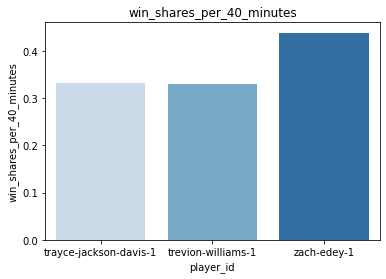

In [194]:
df_big[['player_id','points_produced','minutes_played']].assign(ppm = lambda x: x.points_produced/x.minutes_played)
sns.barplot(data = df_big[['player_id','win_shares_per_40_minutes']],
           x = 'player_id',
           y = 'win_shares_per_40_minutes',
           palette = 'Blues').set(Title = 'win_shares_per_40_minutes');

In [111]:
purdue_player_stats = pd.DataFrame()
for i in purroster.players:
    temp_df = i.dataframe
    temp_df['name'] = i.name
    purdue_player_stats = pd.concat([purdue_player_stats,temp_df])
purdue_player_stats

,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,defensive_win_shares,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,height,minutes_played,offensive_box_plus_minus,offensive_rebound_percentage,offensive_rebounds,offensive_win_shares,personal_fouls,player_efficiency_rating,player_id,points,points_produced,position,steal_percentage,steals,team_abbreviation,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes,name
2020-21,5.9,10.0,9.6,30.0,6.6,big-ten,2.6,21.4,76.0,0.8,0.597,149.0,0.597,89.0,0.611,91.0,0.714,65.0,28.0,2.0,7-4,411.0,4.1,13.8,48.0,1.5,64.0,28.9,zach-edey-1,243.0,218.0,Center,0.6,4.0,purdue,0.000,0.0,NaN,0.0,17.6,124.0,0.632,16.5,38.0,149.0,0.597,89.0,29.0,285.0,2.2,0.219,Zach Edey
2021-22,16.2,4.0,13.4,6.0,16.4,big-ten,3.8,28.3,16.0,0.2,0.769,26.0,0.769,20.0,0.769,20.0,0.8,16.0,3.0,3.0,7-4,57.0,12.6,30.4,14.0,0.5,5.0,55.9,zach-edey-1,56.0,50.0,Center,2.0,2.0,purdue,0.000,0.0,NaN,0.0,29.2,30.0,0.789,16.5,7.0,26.0,0.769,20.0,34.2,285.0,0.8,0.530,Zach Edey
Career,7.1,14.0,10.0,36.0,7.8,,2.7,22.2,92.0,1.0,0.623,175.0,0.623,109.0,0.634,111.0,0.73,81.0,31.0,5.0,7-4,468.0,5.1,15.8,62.0,2.0,69.0,32.2,zach-edey-1,299.0,269.0,Center,0.8,6.0,purdue,0.000,0.0,NaN,0.0,19.0,154.0,0.656,16.5,45.0,175.0,0.623,109.0,29.6,285.0,3.0,0.257,Zach Edey
2020-21,16.4,43.0,3.8,16.0,6.7,big-ten,2.3,11.8,57.0,0.8,0.455,223.0,0.399,89.0,0.327,73.0,0.726,53.0,23.0,12.0,6-4,557.0,4.4,4.0,19.0,1.1,39.0,18.3,jaden-ivey-1,256.0,243.0,Guard,1.8,17.0,purdue,0.435,97.0,0.258,25.0,8.0,76.0,0.497,10.7,31.0,126.0,0.508,64.0,26.8,200.0,1.9,0.136,Jaden Ivey
2021-22,23.0,10.0,0.0,0.0,0.4,big-ten,2.1,22.6,17.0,0.2,0.547,32.0,0.500,16.0,0.469,15.0,0.733,11.0,3.0,3.0,6-4,76.0,-1.8,3.3,2.0,0.3,5.0,23.7,jaden-ivey-1,46.0,45.0,Guard,3.7,5.0,purdue,0.375,12.0,0.250,3.0,13.9,19.0,0.588,20.4,10.0,20.0,0.65,13.0,29.6,200.0,0.5,0.265,Jaden Ivey
Career,17.1,53.0,3.3,16.0,5.9,,2.3,13.1,74.0,1.0,0.467,255.0,0.412,105.0,0.345,88.0,0.727,64.0,26.0,15.0,6-4,633.0,3.7,3.9,21.0,1.4,44.0,18.9,jaden-ivey-1,302.0,288.0,Guard,2.1,22.0,purdue,0.427,109.0,0.257,28.0,8.7,95.0,0.509,12.1,41.0,146.0,0.527,77.0,27.1,200.0,2.4,0.152,Jaden Ivey
2018-19,6.5,16.0,1.2,4.0,2.8,big-ten,3.8,10.4,37.0,0.6,0.552,77.0,0.390,30.0,0.182,14.0,0.357,5.0,36.0,0.0,6-5,417.0,-1.0,0.8,3.0,0.0,43.0,7.6,sasha-stefanovic-1,90.0,81.0,Guard,2.9,20.0,purdue,0.792,61.0,0.410,25.0,5.6,40.0,0.538,23.0,25.0,16.0,0.313,5.0,13.4,200.0,0.6,0.060,Sasha Stefanovic
2019-20,12.7,51.0,1.5,9.0,6.8,big-ten,3.8,10.6,68.0,1.3,0.529,221.0,0.385,85.0,0.222,49.0,0.816,40.0,30.0,22.0,6-5,793.0,3.0,0.7,5.0,1.5,62.0,14.5,sasha-stefanovic-1,274.0,246.0,Guard,2.3,30.0,purdue,0.756,167.0,0.383,64.0,5.4,73.0,0.561,14.4,41.0,54.0,0.389,21.0,18.6,200.0,2.7,0.139,Sasha Stefanovic
2020-21,16.1,64.0,0.7,4.0,6.2,big-ten,2.5,10.1,64.0,0.8,0.571,161.0,0.416,67.0,0.354,57.0,0.842,48.0,25.0,21.0,6-5,735.0,3.7,0.3,2.0,1.9,44.0,15.2,sasha-stefanovic-1,232.0,221.0,Guard,1.5,18.0,purdue,0.776,125.0,0.400,50.0,5.2,66.0,0.617,12.6,27.0,36.0,0.472,17.0,15.1,200.0,2.7,0.147,Sasha Stefanovic
2021-22,14.7,7.0,0.0,0.0,6.5,big-ten,0.3,9.3,7.0,0.2,0.761,23.0,0.522,12.0,0.304,7.0,0.857,6.0,3.0,3.0,6-5,76.0,6.2,0.0,0.0,0.4,4.0,22.9,sasha-stefanovic-1,41.0,34.0,Guard,0.7,1.0,purdue,0.826,19.0,0.579,11.0,5.1,7.0,0.779,10.2,3.0,4.0,0.25,1.0,17.7,200.0,0.6,0.298,Sasha Stefanovic


In [112]:
purdue_player_stats[purdue_player_stats.name == "Sasha Stefanovic"]

,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,defensive_win_shares,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,height,minutes_played,offensive_box_plus_minus,offensive_rebound_percentage,offensive_rebounds,offensive_win_shares,personal_fouls,player_efficiency_rating,player_id,points,points_produced,position,steal_percentage,steals,team_abbreviation,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes,name
2018-19,6.5,16.0,1.2,4.0,2.8,big-ten,3.8,10.4,37.0,0.6,0.552,77.0,0.390,30.0,0.182,14.0,0.357,5.0,36.0,0.0,6-5,417.0,-1.0,0.8,3.0,0.0,43.0,7.6,sasha-stefanovic-1,90.0,81.0,Guard,2.9,20.0,purdue,0.792,61.0,0.410,25.0,5.6,40.0,0.538,23.0,25.0,16.0,0.313,5.0,13.4,200.0,0.6,0.060,Sasha Stefanovic
2019-20,12.7,51.0,1.5,9.0,6.8,big-ten,3.8,10.6,68.0,1.3,0.529,221.0,0.385,85.0,0.222,49.0,0.816,40.0,30.0,22.0,6-5,793.0,3.0,0.7,5.0,1.5,62.0,14.5,sasha-stefanovic-1,274.0,246.0,Guard,2.3,30.0,purdue,0.756,167.0,0.383,64.0,5.4,73.0,0.561,14.4,41.0,54.0,0.389,21.0,18.6,200.0,2.7,0.139,Sasha Stefanovic
2020-21,16.1,64.0,0.7,4.0,6.2,big-ten,2.5,10.1,64.0,0.8,0.571,161.0,0.416,67.0,0.354,57.0,0.842,48.0,25.0,21.0,6-5,735.0,3.7,0.3,2.0,1.9,44.0,15.2,sasha-stefanovic-1,232.0,221.0,Guard,1.5,18.0,purdue,0.776,125.0,0.400,50.0,5.2,66.0,0.617,12.6,27.0,36.0,0.472,17.0,15.1,200.0,2.7,0.147,Sasha Stefanovic
2021-22,14.7,7.0,0.0,0.0,6.5,big-ten,0.3,9.3,7.0,0.2,0.761,23.0,0.522,12.0,0.304,7.0,0.857,6.0,3.0,3.0,6-5,76.0,6.2,0.0,0.0,0.4,4.0,22.9,sasha-stefanovic-1,41.0,34.0,Guard,0.7,1.0,purdue,0.826,19.0,0.579,11.0,5.1,7.0,0.779,10.2,3.0,4.0,0.25,1.0,17.7,200.0,0.6,0.298,Sasha Stefanovic
Career,12.7,138.0,1.1,17.0,5.7,,3.2,10.3,176.0,2.8,0.558,482.0,0.402,194.0,0.263,127.0,0.78,99.0,94.0,46.0,6-5,2021.0,2.5,0.6,10.0,3.8,153.0,13.7,sasha-stefanovic-1,637.0,582.0,Guard,2.1,69.0,purdue,0.772,372.0,0.403,150.0,5.4,186.0,0.587,15.0,96.0,110.0,0.4,44.0,16.2,200.0,6.6,0.132,Sasha Stefanovic


In [ ]:
purdue_player_stats.insert(0,'player_name',purdue_player_stats['name'])
purdue_player_stats.drop('name',1)

In [8]:
sash = Player('sasha-stefanovic-1')

In [10]:
sash.defensive_win_shares

2.7

In [47]:
todays_game = purdue.schedule[2]

In [50]:
todays_game.boxscore_index

In [64]:
gm = Boxscore('2021-11-12-20-purdue')

In [66]:
gm.dataframe

,away_assist_percentage,away_assists,away_block_percentage,away_blocks,away_defensive_rating,away_defensive_rebound_percentage,away_defensive_rebounds,away_effective_field_goal_percentage,away_field_goal_attempts,away_field_goal_percentage,away_field_goals,away_free_throw_attempt_rate,away_free_throw_attempts,away_free_throw_percentage,away_free_throws,away_losses,away_minutes_played,away_offensive_rating,away_offensive_rebound_percentage,away_offensive_rebounds,away_personal_fouls,away_points,away_ranking,away_steal_percentage,away_steals,away_three_point_attempt_rate,away_three_point_field_goal_attempts,away_three_point_field_goal_percentage,away_three_point_field_goals,away_total_rebound_percentage,away_total_rebounds,away_true_shooting_percentage,away_turnover_percentage,away_turnovers,away_two_point_field_goal_attempts,away_two_point_field_goal_percentage,away_two_point_field_goals,away_win_percentage,away_wins,date,home_assist_percentage,home_assists,home_block_percentage,home_blocks,home_defensive_rating,home_defensive_rebound_percentage,home_defensive_rebounds,home_effective_field_goal_percentage,home_field_goal_attempts,home_field_goal_percentage,home_field_goals,home_free_throw_attempt_rate,home_free_throw_attempts,home_free_throw_percentage,home_free_throws,home_losses,home_minutes_played,home_offensive_rating,home_offensive_rebound_percentage,home_offensive_rebounds,home_personal_fouls,home_points,home_ranking,home_steal_percentage,home_steals,home_three_point_attempt_rate,home_three_point_field_goal_attempts,home_three_point_field_goal_percentage,home_three_point_field_goals,home_total_rebound_percentage,home_total_rebounds,home_true_shooting_percentage,home_turnover_percentage,home_turnovers,home_two_point_field_goal_attempts,home_two_point_field_goal_percentage,home_two_point_field_goals,home_win_percentage,home_wins,location,losing_abbr,losing_name,pace,winner,winning_abbr,winning_name
2021-11-12-20-purdue,56.0,14,0.0,0,124.3,62.1,18,0.438,64,0.391,25,0.219,14,0.786,11,0,200,90.5,21.6,8,25,67,None,5.4,4,0.406,26,0.231,6,39.4,26,0.474,13.6,11,38,0.5,19,0.0,0,"November 12, 2021",61.3,19,21.1,8,90.5,78.4,29,0.603,58,0.534,31,0.552,32,0.688,22,0,200,124.3,37.9,11,14,92,7,8.1,6,0.345,20,0.4,8,60.6,40,0.628,14.3,12,38,0.605,23,0.0,0,"Mackey Arena, West Lafayette, Indiana",INDIANA-STATE,Indiana State,73.9,Home,PURDUE,Purdue


In [195]:
player = gm.home_players[1]
player.name

AttributeError: 'Game' object has no attribute 'home_players'

In [60]:
player.name

'Sasha Stefanovic'

In [ ]:
player_df = pd.DataFrame()
for i in gm.home_players:
    temp_df = i.dataframe
    player_df = pd.concat([player_df,temp_df])
player_df

In [198]:
sash = Player('sasha-stefanovic-1')
player_df = pd.DataFrame()
for season in tqdm((2019,2020,2021,2022)):
    teams = Teams(season)
    purdue = teams("PURDUE")
    for gm in purdue.schedule[:8]:
        try:
            box_idx = gm.boxscore_index
            home_players = Boxscore(box_idx).home_players
            away_players = Boxscore(box_idx).home_players
            for i in home_players:
                temp_df = i.dataframe
                temp_df['date'] = gm.date
                temp_df['season'] = season
                player_df = pd.concat([player_df,temp_df])
            for j in away_players:
                temp_df = i.dataframe
                temp_df['date'] = gm.date
                temp_df['season'] = season
                player_df = pd.concat([player_df,temp_df])
        except:
            pass


player_df

100%|██████████| 4/4 [02:01<00:00, 30.37s/it]


,assist_percentage,assists,block_percentage,blocks,defensive_rating,defensive_rebound_percentage,defensive_rebounds,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,minutes_played,offensive_rating,offensive_rebound_percentage,offensive_rebounds,personal_fouls,points,steal_percentage,steals,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,date,season
ryan-cline-1,42.1,8,0.0,0,94,7.4,2,0.650,10,0.500,5,0.000,0,NaN,0,30,159,0.0,0,0,13,0.0,0,0.600,6,0.500,3,4.7,2,0.650,9.1,1,4,0.5,2,18.7,"Tue, Nov 6, 2018",2019
carsen-edwards-1,16.1,2,0.0,0,92,0.0,0,0.794,17,0.588,10,0.176,3,1.0,3,28,156,0.0,0,2,30,2.1,1,0.647,11,0.636,7,0.0,0,0.819,9.8,2,6,0.5,3,36.9,"Tue, Nov 6, 2018",2019
grady-eifert-1,5.2,1,0.0,0,84,31.7,8,1.000,4,0.750,3,0.250,1,1.0,1,28,218,13.6,2,2,9,0.0,0,0.750,3,0.667,2,25.1,10,1.014,0.0,0,1,1.0,1,8.1,"Tue, Nov 6, 2018",2019
nojel-eastern-1,5.4,1,0.0,0,90,14.5,3,0.000,4,0.000,0,0.000,0,NaN,0,23,30,8.3,1,3,0,0.0,0,0.250,1,0.000,0,12.2,4,0.000,33.3,2,3,0.0,0,13.3,"Tue, Nov 6, 2018",2019
eric-hunterjr-1,31.3,3,0.0,0,91,13.1,2,0.750,6,0.667,4,0.333,2,0.5,1,17,174,11.2,1,1,10,0.0,0,0.500,3,0.333,1,12.4,3,0.727,0.0,0,3,1.0,3,20.6,"Tue, Nov 6, 2018",2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ethan-morton-1,53.7,2,0.0,0,103,0.0,0,0.750,2,0.500,1,0.000,0,NaN,0,9,176,0.0,0,0,3,0.0,0,0.500,1,1.000,1,0.0,0,0.750,0.0,0,1,0.0,0,10.9,"Fri, Dec 3, 2021",2022
ethan-morton-1,53.7,2,0.0,0,103,0.0,0,0.750,2,0.500,1,0.000,0,NaN,0,9,176,0.0,0,0,3,0.0,0,0.500,1,1.000,1,0.0,0,0.750,0.0,0,1,0.0,0,10.9,"Fri, Dec 3, 2021",2022
ethan-morton-1,53.7,2,0.0,0,103,0.0,0,0.750,2,0.500,1,0.000,0,NaN,0,9,176,0.0,0,0,3,0.0,0,0.500,1,1.000,1,0.0,0,0.750,0.0,0,1,0.0,0,10.9,"Fri, Dec 3, 2021",2022
ethan-morton-1,53.7,2,0.0,0,103,0.0,0,0.750,2,0.500,1,0.000,0,NaN,0,9,176,0.0,0,0,3,0.0,0,0.500,1,1.000,1,0.0,0,0.750,0.0,0,1,0.0,0,10.9,"Fri, Dec 3, 2021",2022


In [206]:
sash.dataframe.reset_index()

,level_0,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,defensive_win_shares,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,height,minutes_played,offensive_box_plus_minus,offensive_rebound_percentage,offensive_rebounds,offensive_win_shares,personal_fouls,player_efficiency_rating,player_id,points,points_produced,position,steal_percentage,steals,team_abbreviation,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes
0,2018-19,6.5,16,1.2,4,2.8,big-ten,3.8,10.4,37,0.6,0.552,77,0.390,30,0.182,14,0.357,5,36,0,6-5,417,-1.0,0.8,3,0.0,43,7.6,sasha-stefanovic-1,90,81,Guard,2.9,20,purdue,0.792,61,0.410,25,5.6,40,0.538,23.0,25,16,0.313,5,13.4,200,0.6,0.060
1,2019-20,12.7,51,1.5,9,6.8,big-ten,3.8,10.6,68,1.3,0.529,221,0.385,85,0.222,49,0.816,40,30,22,6-5,793,3.0,0.7,5,1.5,62,14.5,sasha-stefanovic-1,274,246,Guard,2.3,30,purdue,0.756,167,0.383,64,5.4,73,0.561,14.4,41,54,0.389,21,18.6,200,2.7,0.139
2,2020-21,16.1,64,0.7,4,6.2,big-ten,2.5,10.1,64,0.8,0.571,161,0.416,67,0.354,57,0.842,48,25,21,6-5,735,3.7,0.3,2,1.9,44,15.2,sasha-stefanovic-1,232,221,Guard,1.5,18,purdue,0.776,125,0.400,50,5.2,66,0.617,12.6,27,36,0.472,17,15.1,200,2.7,0.147
3,2021-22,26.1,36,0.0,0,8.6,big-ten,1.6,8.4,18,0.3,0.617,64,0.438,28,0.328,21,0.905,19,8,8,6-5,215,7.0,0.0,0,1.1,12,20.4,sasha-stefanovic-1,98,101,Guard,0.5,2,purdue,0.781,50,0.460,23,4.8,18,0.662,12.9,11,14,0.357,5,19.1,200,1.4,0.253
4,Career,14.0,167,1.0,17,6.0,,3.1,10.1,187,3.0,0.556,523,0.402,210,0.270,141,0.794,112,99,51,6-5,2160,2.9,0.5,10,4.4,161,14.0,sasha-stefanovic-1,694,649,Guard,2.0,70,purdue,0.771,403,0.402,162,5.3,197,0.588,15.0,104,120,0.400,48,16.5,200,7.4,0.138


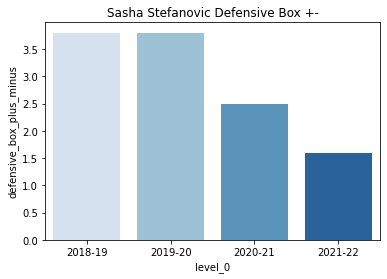

In [210]:
sns.barplot(data = sash.dataframe.reset_index()[sash.dataframe.reset_index().level_0 != "Career"] ,
            x = 'level_0',
            y = 'defensive_box_plus_minus',
           palette = 'Blues').set(title = "Sasha Stefanovic Defensive Box +-");

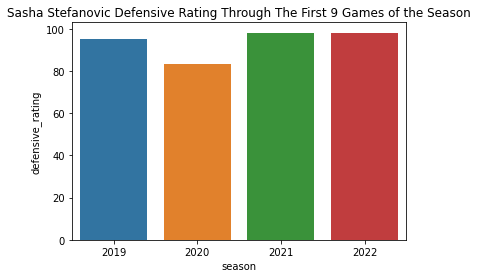

In [200]:
sns.barplot(data= player_df.reset_index()[player_df.index == 'sasha-stefanovic-1'][['index','season','defensive_rating']].groupby('season')['defensive_rating'].mean().reset_index(),
           x = 'season',
           y = 'defensive_rating').set(title = "Sasha Stefanovic Defensive Rating Through The First 9 Games of the Season");

In [201]:
player_df.reset_index()[player_df.index == 'sasha-stefanovic-1'][['index','season','defensive_rating']].groupby('season')['defensive_rating'].mean().reset_index()

,season,defensive_rating
0,2019,95.000000
1,2020,83.333333
2,2021,98.200000
3,2022,97.857143


In [116]:
player_df.reset_index()[player_df.index == 'sasha-stefanovic-1'][['index','season','defensive_rating','minutes_played']].assign(df_min = lambda x: x.defensive_rating/x.minutes_played).groupby('season').df_min.mean().to_frame()

,df_min
season,
2019,11.372807
2020,4.764550
2021,3.007058
2022,3.826728


In [117]:
df_agg = pd.DataFrame()
seasons = [2022]
for season in seasons:
    print("Getting Season Data...")
    for t in Teams(season):
        try:
            temp_df = t.dataframe
            temp_df['season'] = season
            df_agg = pd.concat([df_agg,temp_df],axis=0)
        except:
            pass
        
df_agg

Getting Season Data...


,abbreviation,assist_percentage,assists,away_losses,away_wins,block_percentage,blocks,conference,conference_losses,conference_wins,defensive_rebounds,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,free_throws_per_field_goal_attempt,games_played,home_losses,home_wins,losses,minutes_played,name,net_rating,offensive_rating,offensive_rebound_percentage,offensive_rebounds,opp_assist_percentage,opp_assists,opp_block_percentage,opp_blocks,opp_defensive_rebounds,opp_effective_field_goal_percentage,opp_field_goal_attempts,opp_field_goal_percentage,opp_field_goals,opp_free_throw_attempt_rate,opp_free_throw_attempts,opp_free_throw_percentage,opp_free_throws,opp_free_throws_per_field_goal_attempt,opp_offensive_rating,opp_offensive_rebound_percentage,opp_offensive_rebounds,opp_personal_fouls,opp_points,opp_steal_percentage,opp_steals,opp_three_point_attempt_rate,opp_three_point_field_goal_attempts,opp_three_point_field_goal_percentage,opp_three_point_field_goals,opp_two_point_field_goal_attempts,opp_two_point_field_goal_percentage,opp_two_point_field_goals,opp_total_rebound_percentage,opp_total_rebounds,opp_true_shooting_percentage,opp_turnover_percentage,opp_turnovers,pace,personal_fouls,points,simple_rating_system,steal_percentage,steals,strength_of_schedule,three_point_attempt_rate,three_point_field_goal_attempts,three_point_field_goal_percentage,three_point_field_goals,two_point_field_goal_attempts,two_point_field_goal_percentage,two_point_field_goals,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,win_percentage,wins,season
ABILENE-CHRISTIAN,ABILENE-CHRISTIAN,60.5,46,2,1,5.5,6,wac,0,0,71,0.439,197,0.386,76,0.345,68,0.632,43,0.218,3,0,0,2,135,Abilene Christian,None,92.3,28.7,39,58.3,42,12.3,16,97,0.497,167,0.431,72,0.479,80,0.700,56,0.335,None,35.5,39,67,222,9.0,21,0.347,58,0.379,22,109,0.459,50,55.3,136,0.541,24.9,68,69.2,72,216,-6.39,15.8,37,-4.39,0.340,67,0.313,21,130,0.423,55,44.7,110,0.471,15.8,43,0.333,1,2022
AIR-FORCE,AIR-FORCE,49.2,32,0,1,10.5,12,mwc,0,0,79,0.546,141,0.461,65,0.248,35,0.543,19,0.135,3,0,1,1,120,Air Force,None,89.6,13.8,11,38.1,24,6.3,4,69,0.425,166,0.380,63,0.259,43,0.767,33,0.199,None,28.8,32,47,174,9.3,18,0.313,52,0.288,15,114,0.421,48,52.9,101,0.467,16.2,36,64.3,48,173,-4.63,7.3,14,-4.30,0.546,77,0.312,24,64,0.641,41,47.1,90,0.549,23.7,49,0.667,2,2022
AKRON,AKRON,40.0,40,1,0,12.4,14,mac,0,0,83,0.593,193,0.518,100,0.306,59,0.644,38,0.197,3,0,2,1,120,Akron,None,129.0,48.6,51,39.3,22,7.1,8,54,0.381,164,0.341,56,0.232,38,0.684,26,0.159,None,25.2,28,57,151,8.2,17,0.311,51,0.255,13,113,0.381,43,38.0,82,0.415,22.9,54,69.0,45,267,10.35,13.5,28,11.35,0.420,81,0.358,29,112,0.634,71,62.0,134,0.604,14.0,36,0.667,2,2022
ALABAMA-AM,ALABAMA-AM,45.8,33,2,0,3.0,3,swac,0,0,70,0.412,193,0.373,72,0.264,51,0.706,36,0.187,3,0,1,2,120,Alabama A&M,None,91.5,26.2,34,63.3,50,5.6,8,96,0.522,185,0.427,79,0.270,50,0.780,39,0.211,None,34.6,37,50,232,8.0,17,0.454,84,0.417,35,101,0.436,44,56.1,133,0.556,16.1,40,71.2,49,195,-13.73,10.3,22,-1.40,0.254,49,0.306,15,144,0.396,57,43.9,104,0.449,12.8,32,0.333,1,2022
ALABAMA-BIRMINGHAM,ALABAMA-BIRMINGHAM,44.0,59,1,0,12.9,17,cusa,0,0,89,0.545,275,0.487,134,0.273,75,0.640,48,0.175,4,0,3,1,160,Alabama-Birmingham,None,117.6,31.8,50,54.7,52,6.1,11,107,0.536,208,0.457,95,0.351,73,0.712,52,0.250,None,30.5,39,65,275,5.7,17,0.365,76,0.434,33,132,0.470,62,51.2,146,0.567,26.8,89,73.9,71,348,10.19,20.6,61,-1.81,0.349,96,0.333,32,179,0.570,102,48.8,139,0.560,10.9,38,0.750,3,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRIGHT-STATE,WRIGHT-STATE,48.7,37

In [158]:
df_agg[(df_agg.name == 'Purdue') | (df_agg.name == 'Villanova')].transpose().tail(50)

,PURDUE,VILLANOVA
opp_effective_field_goal_percentage,0.431,0.567
opp_field_goal_attempts,182,164
opp_field_goal_percentage,0.368,0.494
opp_field_goals,67,81
opp_free_throw_attempt_rate,0.198,0.244
opp_free_throw_attempts,36,40
opp_free_throw_percentage,0.806,0.8
opp_free_throws,29,32
opp_free_throws_per_field_goal_attempt,0.159,0.195
opp_offensive_rating,None,None


In [124]:
nova = teams("Villanova")

In [126]:
ros = nova.roster

In [138]:
df = pd.DataFrame()
for i in ros.players:
    #print(i.name+": "+i.height)
    temp = i.dataframe
    df = pd.concat([temp,df])
df

,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,defensive_win_shares,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,height,minutes_played,offensive_box_plus_minus,offensive_rebound_percentage,offensive_rebounds,offensive_win_shares,personal_fouls,player_efficiency_rating,player_id,points,points_produced,position,steal_percentage,steals,team_abbreviation,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes
2019-20,10.3,5,0.0,0,-3.8,big-east,1.7,6.4,5,0.1,0.348,23,0.304,7,0.087,2,1.0,2,16,0,6-5,87,-5.5,1.4,1,0.0,14,4.4,bryan-antoine-1,18,19,Guard,2.0,3,villanova,0.652,15,0.133,2,4.0,6,0.376,7.7,2,8,0.625,5,15.7,180,0.1,0.042
2020-21,10.0,7,0.0,0,6.1,big-east,4.3,10.4,10,0.1,0.559,17,0.412,7,0.294,5,0.8,4,10,0,6-5,118,1.8,2.0,2,0.2,6,13.0,bryan-antoine-1,23,24,Guard,2.6,5,villanova,0.765,13,0.385,5,6.1,12,0.594,4.9,1,4,0.5,2,9.2,180,0.4,0.133
Career,10.1,12,0.0,0,1.9,,3.2,8.7,15,0.3,0.438,40,0.35,14,0.175,7,0.857,6,26,0,6-5,205,-1.3,1.7,3,0.2,20,9.4,bryan-antoine-1,41,43,Guard,2.4,8,villanova,0.7,28,0.25,7,5.2,18,0.473,6.5,3,12,0.583,7,12.0,180,0.5,0.094
2021-22,0.0,0,0.0,0,None,big-east,None,0.0,0,0.0,None,0,None,0,None,0,None,0,1,0,6-5,1,None,0.0,0,0.0,0,0.0,kevin-voigt-1,0,0,Guard,0.0,0,villanova,None,0,None,0,0.0,0,None,None,0,0,None,0,0.0,193,0.0,-0.020
Career,0.0,0,0.0,0,None,,None,0.0,0,0.0,None,0,None,0,None,0,None,0,1,0,6-5,1,None,0.0,0,0.0,0,0.0,kevin-voigt-1,0,0,Guard,0.0,0,villanova,None,0,None,0,0.0,0,None,None,0,0,None,0,0.0,193,0.0,-0.020
2020-21,51.1,1,0.0,0,18.6,big-east,16.8,0.0,0,0.0,0.0,1,0.0,0,0.0,0,None,0,2,0,6-8,3,1.8,0.0,0,0.0,0,20.2,trey-patterson-2,0,1,Forward,20.3,1,villanova,0.0,0,NaN,0,0.0,0,0.0,0.0,0,1,0.0,0,17.8,210,0.0,0.082
2021-22,12.1,1,0.0,0,NaN,big-east,NaN,11.1,1,0.0,0.333,3,0.333,1,0.0,0,None,0,3,0,6-8,13,NaN,10.5,1,0.0,2,1.4,trey-patterson-2,2,3,Forward,0.0,0,villanova,0.333,1,0.0,0,10.7,2,0.333,25.0,1,2,0.5,1,17.2,210,0.0,-0.029
Career,19.4,2,0.0,0,18.6,,16.8,9.0,1,0.0,0.25,4,0.25,1,0.0,0,None,0,5,0,6-8,16,1.8,8.5,1,0.0,2,4.9,trey-patterson-2,2,4,Forward,3.8,1,villanova,0.25,1,0.0,0,8.7,2,0.25,20.0,1,3,0.333,1,17.3,210,0.0,-0.008
2021-22,0.0,0,9.2,1,None,big-east,None,55.3,5,0.0,0.5,2,0.5,1,0.0,0,None,0,2,1,6-9,13,None,20.9,2,0.0,1,20.6,nnanna-njoku-1,2,3,Forward,0.0,0,villanova,0.0,0,None,0,37.6,7,0.5,0.0,0,2,0.5,1,8.6,260,0.1,0.192
Career,0.0,0,9.2,1,None,,None,55.3,5,0.0,0.5,2,0.5,1,0.0,0,None,0,2,1,6-9,13,None,20.9,2,0.0,1,20.6,nnanna-njoku-1,2,3,Forward,0.0,0,villanova,0.0,0,None,0,37.6,7,0.5,0.0,0,2,0.5,1,8.6,260,0.1,0.192


In [143]:
df = df.reset_index()
df

,level_0,assist_percentage,assists,block_percentage,blocks,box_plus_minus,conference,defensive_box_plus_minus,defensive_rebound_percentage,defensive_rebounds,defensive_win_shares,effective_field_goal_percentage,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempt_rate,free_throw_attempts,free_throw_percentage,free_throws,games_played,games_started,height,minutes_played,offensive_box_plus_minus,offensive_rebound_percentage,offensive_rebounds,offensive_win_shares,personal_fouls,player_efficiency_rating,player_id,points,points_produced,position,steal_percentage,steals,team_abbreviation,three_point_attempt_rate,three_point_attempts,three_point_percentage,three_pointers,total_rebound_percentage,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,two_point_attempts,two_point_percentage,two_pointers,usage_percentage,weight,win_shares,win_shares_per_40_minutes
0,2019-20,10.3,5,0.0,0,-3.8,big-east,1.7,6.4,5,0.1,0.348,23,0.304,7,0.087,2,1.0,2,16,0,6-5,87,-5.5,1.4,1,0.0,14,4.4,bryan-antoine-1,18,19,Guard,2.0,3,villanova,0.652,15,0.133,2,4.0,6,0.376,7.7,2,8,0.625,5,15.7,180,0.1,0.042
1,2020-21,10.0,7,0.0,0,6.1,big-east,4.3,10.4,10,0.1,0.559,17,0.412,7,0.294,5,0.8,4,10,0,6-5,118,1.8,2.0,2,0.2,6,13.0,bryan-antoine-1,23,24,Guard,2.6,5,villanova,0.765,13,0.385,5,6.1,12,0.594,4.9,1,4,0.5,2,9.2,180,0.4,0.133
2,Career,10.1,12,0.0,0,1.9,,3.2,8.7,15,0.3,0.438,40,0.35,14,0.175,7,0.857,6,26,0,6-5,205,-1.3,1.7,3,0.2,20,9.4,bryan-antoine-1,41,43,Guard,2.4,8,villanova,0.7,28,0.25,7,5.2,18,0.473,6.5,3,12,0.583,7,12.0,180,0.5,0.094
3,2021-22,0.0,0,0.0,0,None,big-east,None,0.0,0,0.0,None,0,None,0,None,0,None,0,1,0,6-5,1,None,0.0,0,0.0,0,0.0,kevin-voigt-1,0,0,Guard,0.0,0,villanova,None,0,None,0,0.0,0,None,None,0,0,None,0,0.0,193,0.0,-0.020
4,Career,0.0,0,0.0,0,None,,None,0.0,0,0.0,None,0,None,0,None,0,None,0,1,0,6-5,1,None,0.0,0,0.0,0,0.0,kevin-voigt-1,0,0,Guard,0.0,0,villanova,None,0,None,0,0.0,0,None,None,0,0,None,0,0.0,193,0.0,-0.020
5,2020-21,51.1,1,0.0,0,18.6,big-east,16.8,0.0,0,0.0,0.0,1,0.0,0,0.0,0,None,0,2,0,6-8,3,1.8,0.0,0,0.0,0,20.2,trey-patterson-2,0,1,Forward,20.3,1,villanova,0.0,0,NaN,0,0.0,0,0.0,0.0,0,1,0.0,0,17.8,210,0.0,0.082
6,2021-22,12.1,1,0.0,0,NaN,big-east,NaN,11.1,1,0.0,0.333,3,0.333,1,0.0,0,None,0,3,0,6-8,13,NaN,10.5,1,0.0,2,1.4,trey-patterson-2,2,3,Forward,0.0,0,villanova,0.333,1,0.0,0,10.7,2,0.333,25.0,1,2,0.5,1,17.2,210,0.0,-0.029
7,Career,19.4,2,0.0,0,18.6,,16.8,9.0,1,0.0,0.25,4,0.25,1,0.0,0,None,0,5,0,6-8,16,1.8,8.5,1,0.0,2,4.9,trey-patterson-2,2,4,Forward,3.8,1,villanova,0.25,1,0.0,0,8.7,2,0.25,20.0,1,3,0.333,1,17.3,210,0.0,-0.008
8,2021-22,0.0,0,9.2,1,None,big-east,None,55.3,5,0.0,0.5,2,0.5,1,0.0,0,None,0,2,1,6-9,13,None,20.9,2,0.0,1,20.6,nnanna-njoku-1,2,3,Forward,0.0,0,villanova,0.0,0,None,0,37.6,7,0.5,0.0,0,2,0.5,1,8.6,260,0.1,0.192
9,Career,0.0,0,9.2,1,None,,None,55.3,5,0.0,0.5,2,0.5,1,0.0,0,None,0,2,1,6-9,13,None,20.9,2,0.0,1,20.6,nnanna-njoku-1,2,3,Forward,0.0,0,villanova,0.0,0,None,0,37.6,7,0.5,0.0,0,2,0.5,1,8.6,260,0.1,0.192


Index(['level_0', 'assist_percentage', 'assists', 'block_percentage', 'blocks',
       'box_plus_minus', 'conference', 'defensive_box_plus_minus',
       'defensive_rebound_percentage', 'defensive_rebounds',
       'defensive_win_shares', 'effective_field_goal_percentage',
       'field_goal_attempts', 'field_goal_percentage', 'field_goals',
       'free_throw_attempt_rate', 'free_throw_attempts',
       'free_throw_percentage', 'free_throws', 'games_played', 'games_started',
       'height', 'minutes_played', 'offensive_box_plus_minus',
       'offensive_rebound_percentage', 'offensive_rebounds',
       'offensive_win_shares', 'personal_fouls', 'player_efficiency_rating',
       'player_id', 'points', 'points_produced', 'position',
       'steal_percentage', 'steals', 'team_abbreviation',
       'three_point_attempt_rate', 'three_point_attempts',
       'three_point_percentage', 'three_pointers', 'total_rebound_percentage',
       'total_rebounds', 'true_shooting_percentage', 'turnove

In [157]:
df[df.level_0 == '2021-22'][['player_id','defensive_rebound_percentage','offensive_rebound_percentage']]

,player_id,defensive_rebound_percentage,offensive_rebound_percentage
3,kevin-voigt-1,0.0,0.0
6,trey-patterson-2,11.1,10.5
8,nnanna-njoku-1,55.3,20.9
12,chris-arciadiacono-1,4.1,3.9
14,jordan-longino-1,0.0,0.0
19,caleb-daniels-1,15.2,4.1
22,eric-dixon-1,22.2,8.1
28,jermaine-samuels-1,13.9,5.8
33,brandon-slater-1,15.1,4.3
39,collin-gillespie-1,5.8,0.0
